In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

from scipy import stats as sts
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

In [2]:
data = pd.read_excel('taxi.xlsx')
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [3]:
#  чистим данные #1. Большая часть поездок производится на расстояние до 100 км / остальные отбрасываем
print ('Доля заказов на расстояние до 100 км составляет', 
       100 * data[data['distance_km']<=100].shape[0] / data.shape[0],
       'процентов от общего количества поездок')

data_plan = data[data['distance_km']<=100]
data_plan.head(1)

Доля заказов на расстояние до 100 км составляет 99.825 процентов от общего количества поездок


,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.35501,-1.0,-1.0,Economy,private,0


In [4]:
#  чистим данные #2. Часть заказов в составе датасета не состоялось (расстояниие и ипродолжительность поездки <=0)
# сформируем базу совершенных поездок для анализа продолжительности именно совершенных поездок
print ('Доля исполненных заказов (фактических поездок)  составляет', 
       100 * data_plan[data_plan['distance_km']>0].shape[0] / data.shape[0],
       'процентов от общего количества поездок')

data_fact = data_plan[data_plan['distance_km']>0]
data_fact.head(1)

Доля исполненных заказов (фактических поездок)  составляет 73.466 процентов от общего количества поездок


,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1


Построить сводную таблицу: День недели/Часы - Среднее количество заказов/Минимальное/Максимальное количество заказов/

In [5]:
# Все заказы
pt_taxi = pd.pivot_table(data_plan, 
                         values     = ['order_gk'],  
                         index      = ['hour_key'],
                         columns    = ['weekday_key'], 
                         aggfunc    = ['count'])

pt_taxi['avg_hour']     = pt_taxi.mean(axis=1)
pt_taxi['min_hour']     = pt_taxi.min(axis=1)
pt_taxi['max_hour']     = pt_taxi.max(axis=1)
pt_taxi.loc['mean_wday']= pt_taxi.mean()
pt_taxi.loc['min_wday'] = pt_taxi.min()
pt_taxi.loc['max_wday'] = pt_taxi.max()
pt_taxi.round(1)

count                                                avg_hour  \
            order_gk                                                           
weekday_key        0       1       2      3       4       5       6            
hour_key                                                                       
0             1154.0  1609.0   620.0  526.0   612.0  1042.0  1064.0    946.7   
1              647.0   607.0   284.0  332.0   264.0   566.0   758.0    494.0   
2              547.0   384.0   189.0  165.0   153.0   197.0   635.0    324.3   
3              440.0   246.0   160.0  110.0   120.0   192.0   495.0    251.9   
4              482.0   479.0   150.0  134.0   244.0   312.0   390.0    313.0   
5              409.0   302.0   203.0  138.0   116.0   350.0   288.0    258.0   
6              271.0   261.0   197.0  147.0   129.0   328.0   273.0    229.4   
7              163.0   428.0   305.0  383.0   412.0   584.0   207.0    354.6   
8              200.0   601.0   516.0  519.0   653.0   776.0   282.0    506.7   
9              233.0   478.0   509.0  481.0   556.0   685.0   355.0    471.0   
10             284.0   355.0   462.0  364.0   407.0   540.0   424.0    405.1   
11             330.0   400.0   431.0  351.0   375.0   526.0   469.0    411.7   
12             379.0   377.0   435.0  371.0   404.0   622.0   575.0    451.9   
13             474.0   370.0   425.0  415.0   426.0   659.0   579.0    478.3   
14             499.0   389.0   477.0  422.0   443.0   731.0   615.0    510.9   
15             575.0   464.0   581.0  557.0   582.0   882.0   600.0    605.9   
16             676.0   503.0   605.0  450.0   584.0  1023.0   653.0    642.0   
17             673.0   516.0   707.0  574.0   611.0  1167.0   773.0    717.3   
18             687.0   699.0   849.0  747.0   854.0  1350.0   694.0    840.0   
19             847.0   711.0   822.0  832.0  1130.0  1258.0   759.0    908.4   
20             864.0   749.0   933.0  878.0   957.0  1269.0   906.0    936.6   
21            1058.0   753.0  1020.0  889.0  1163.0  1230.0  1277.0   1055.7   
22            1140.0   550.0   956.0  913.0   958.0  1326.0  1023.0    980.9   
23            1352.0   836.0  1002.0  889.0  1123.0  1623.0  1341.0   1166.6   
mean_wday      599.3   544.5   534.9  482.8   553.2   801.6   643.1    594.2   
min_wday       163.0   246.0   150.0  110.0   116.0   192.0   207.0    229.4   
max_wday      1352.0  1609.0  1020.0  913.0  1163.0  1623.0  1341.0   1166.6   

            min_hour max_hour  
                               
weekday_key                    
hour_key                       
0              526.0   1609.0  
1              264.0    758.0  
2              153.0    635.0  
3              110.0    495.0  
4              134.0    482.0  
5              116.0    409.0  
6              129.0    328.0  
7              163.0    584.0  
8              200.0    776.0  
9              233.0    685.0  
10             284.0    540.0  
11             330.0    526.0  
12             371.0    622.0  
13             370.0    659.0  
14             389.0    731.0  
15             464.0    882.0  
16             450.0   1023.0  
17             516.0   1167.0  
18             687.0   1350.0  
19             711.0   1258.0  
20             749.0   1269.0  
21             753.0   1277.0  
22             550.0   1326.0  
23             836.0   1623.0  
mean_wday      395.3    875.6  
min_wday       110.0    328.0  
max_wday       836.0   1623.0

In [6]:
# Только исполненные заказы
pt_taxi = pd.pivot_table(data_fact, 
                         values     = ['order_gk'],  
                         index      = ['hour_key'],
                         columns    = ['weekday_key'], 
                         aggfunc    = ['count'])

pt_taxi['avg_hour']     = pt_taxi.mean(axis=1)
pt_taxi['min_hour']     = pt_taxi.min(axis=1)
pt_taxi['max_hour']     = pt_taxi.max(axis=1)
pt_taxi.loc['mean_wday']= pt_taxi.mean()
pt_taxi.loc['min_wday'] = pt_taxi.min()
pt_taxi.loc['max_wday'] = pt_taxi.max()
pt_taxi.round(1)

count                                              avg_hour  \
            order_gk                                                         
weekday_key        0       1      2      3      4       5       6            
hour_key                                                                     
0              857.0  1368.0  400.0  340.0  410.0   769.0   737.0    697.3   
1              494.0   476.0  213.0  245.0  173.0   410.0   546.0    365.3   
2              407.0   317.0  132.0  107.0  107.0   116.0   454.0    234.3   
3              322.0   167.0  101.0   66.0   75.0   123.0   375.0    175.6   
4              373.0   386.0  111.0   84.0  192.0   232.0   282.0    237.1   
5              330.0   243.0  141.0   96.0   85.0   241.0   193.0    189.9   
6              234.0   186.0  163.0  114.0   98.0   254.0   216.0    180.7   
7              114.0   330.0  231.0  304.0  317.0   466.0   155.0    273.9   
8              145.0   476.0  400.0  410.0  506.0   630.0   220.0    398.1   
9              177.0   353.0  384.0  345.0  416.0   544.0   268.0    355.3   
10             220.0   256.0  320.0  258.0  295.0   393.0   315.0    293.9   
11             270.0   295.0  270.0  248.0  262.0   368.0   369.0    297.4   
12             287.0   265.0  296.0  252.0  271.0   461.0   428.0    322.9   
13             371.0   247.0  275.0  273.0  290.0   486.0   438.0    340.0   
14             358.0   262.0  316.0  282.0  304.0   519.0   480.0    360.1   
15             448.0   316.0  407.0  396.0  390.0   645.0   434.0    433.7   
16             498.0   341.0  429.0  307.0  404.0   762.0   514.0    465.0   
17             522.0   341.0  492.0  387.0  434.0   862.0   556.0    513.4   
18             506.0   492.0  620.0  548.0  634.0   983.0   515.0    614.0   
19             659.0   512.0  645.0  637.0  824.0   999.0   589.0    695.0   
20             682.0   547.0  703.0  619.0  733.0   979.0   707.0    710.0   
21             849.0   545.0  750.0  649.0  852.0   942.0  1041.0    804.0   
22             867.0   355.0  665.0  608.0  643.0   969.0   726.0    690.4   
23            1106.0   607.0  723.0  586.0  695.0  1185.0  1033.0    847.9   
mean_wday      462.3   403.5  382.8  340.0  392.1   597.4   483.0    437.3   
min_wday       114.0   167.0  101.0   66.0   75.0   116.0   155.0    175.6   
max_wday      1106.0  1368.0  750.0  649.0  852.0  1185.0  1041.0    847.9   

            min_hour max_hour  
                               
weekday_key                    
hour_key                       
0              340.0   1368.0  
1              173.0    546.0  
2              107.0    454.0  
3               66.0    375.0  
4               84.0    386.0  
5               85.0    330.0  
6               98.0    254.0  
7              114.0    466.0  
8              145.0    630.0  
9              177.0    544.0  
10             220.0    393.0  
11             248.0    369.0  
12             252.0    461.0  
13             247.0    486.0  
14             262.0    519.0  
15             316.0    645.0  
16             307.0    762.0  
17             341.0    862.0  
18             492.0    983.0  
19             512.0    999.0  
20             547.0    979.0  
21             545.0   1041.0  
22             355.0    969.0  
23             586.0   1185.0  
mean_wday      275.8    666.9  
min_wday        66.0    254.0  
max_wday       586.0   1368.0

Провести описательную статистику

In [7]:
#  отношении всех заказов
data_plan.describe().round(1)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,99825.0,99825.0,99825.0,99825.0,99825.0,99825.0,99825.0,99825.0,99825.0,99825.0,99825.0,99825.0
mean,566254.8,3.2,13.8,3446.0,460876.4,55.7,37.5,55.8,37.5,17.7,22.6,0.5
std,325941.4,2.1,7.3,2038.6,266052.5,2.1,1.5,0.7,0.5,20.0,20.6,0.5
min,4.0,0.0,0.0,14.0,18.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
25%,285639.0,1.0,8.0,1421.0,229183.0,55.7,37.4,55.7,37.4,-1.0,-1.0,0.0
50%,565754.0,3.0,16.0,3506.0,462500.0,55.8,37.5,55.8,37.5,10.4,19.6,0.0
75%,848793.0,5.0,20.0,5242.0,690834.0,56.0,37.6,56.0,37.6,30.5,37.7,1.0
max,1130355.0,6.0,23.0,6806.0,920344.0,56.2,38.3,56.3,38.2,99.6,108.6,1.0


In [8]:
print('В отношении всех заказов')
print('Мода    по полю  weekday_key      ', statistics.mode(data_plan['weekday_key']))
print('Мода    по полю  hour_key         ', statistics.mode(data_plan['hour_key']))
print('Мода    по полю  distance         ', statistics.mode(data_plan['distance_km']))
print('Мода    по полю  duration         ', statistics.mode(data_plan['duration_min']))
print('Мода    по полю  offer_class_group', statistics.mode(data_plan['offer_class_group']))
print('Мода    по полю  ride_type_desc   ', statistics.mode(data_plan['ride_type_desc']))

В отношении всех заказов
Мода    по полю  weekday_key       5
Мода    по полю  hour_key          23
Мода    по полю  distance          -1.0
Мода    по полю  duration          -1.0
Мода    по полю  offer_class_group Economy
Мода    по полю  ride_type_desc    private


In [14]:
#  только в отношении исполненных заказов
data_fact.describe().round(1)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,73466.0,73466.0,73466.0,73466.0,73466.0,73466.0,73466.0,73466.0,73466.0,73466.0,73466.0,73466.0
mean,565812.3,3.1,13.8,3461.1,461935.6,55.8,37.5,55.8,37.5,24.3,31.0,0.5
std,326290.1,2.1,7.3,2039.2,266102.3,0.9,0.6,0.7,0.5,19.4,17.5,0.5
min,4.0,0.0,0.0,14.0,27.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
25%,284898.2,1.0,8.0,1421.0,230566.0,55.7,37.4,55.7,37.4,7.9,16.6,0.0
50%,564894.0,3.0,16.0,3507.0,463297.0,55.8,37.5,55.8,37.5,18.6,28.2,0.0
75%,849669.8,5.0,20.0,5246.0,692504.0,56.0,37.6,56.0,37.6,38.7,44.3,1.0
max,1130355.0,6.0,23.0,6806.0,920344.0,56.0,38.2,56.0,38.2,99.6,108.6,1.0


In [15]:
print('только в отношении исполненных заказов')
print('Мода    по полю  weekday_key      ', statistics.mode(data_fact['weekday_key']))
print('Мода    по полю  hour_key         ', statistics.mode(data_fact['hour_key']))
print('Мода    по полю  distance         ', statistics.mode(data_fact['distance_km']))
print('Мода    по полю  duration         ', statistics.mode(data_fact['duration_min']))
print('Мода    по полю  offer_class_group', statistics.mode(data_fact['offer_class_group']))
print('Мода    по полю  ride_type_desc   ', statistics.mode(data_fact['ride_type_desc']))

только в отношении исполненных заказов
Мода    по полю  weekday_key       5
Мода    по полю  hour_key          23
Мода    по полю  distance          7.718
Мода    по полю  duration          21.467
Мода    по полю  offer_class_group Economy
Мода    по полю  ride_type_desc    private


Построить гистограмму распределения расстояний (distance_km)

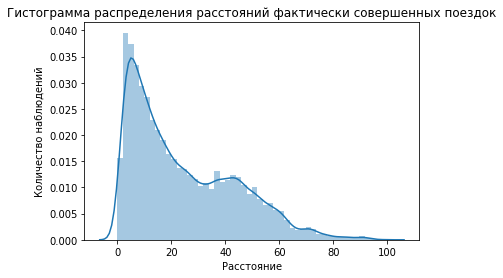

In [16]:
sns.distplot(data_fact['distance_km'])
plt.xlabel('Расстояние')
plt.ylabel('Количество наблюдений')
plt.title('Гистограмма распределения расстояний фактически совершенных поездок')
plt.show()

Рассчитать перцентили и квантили распределения расстояний (distance_km)

In [17]:
# Персентили
data_fact['distance_km'].quantile(np.linspace(.1, 1, 9, 0), 'lower')

0.1     3.739
0.2     6.411
0.3     9.630
0.4    13.537
0.5    18.599
0.6    25.409
0.7    34.120
0.8    42.946
0.9    52.608
Name: distance_km, dtype: float64

In [18]:
# Квартили 
data_fact['distance_km'].quantile(np.linspace(.25, 1, 3, 0), 'lower')

0.25     7.944
0.50    18.599
0.75    38.648
Name: distance_km, dtype: float64

Сформулировать 2 гипотезы и провести статистический анализ данных

Гипотеза 1:   В выходные дни распределение поездок по расстоянию у такси класса Эконом и Стандарт статистически различно

In [19]:
# Эконом
Eco_dist  = data_fact[(data_fact.weekday_key > 4) & (data_fact.offer_class_group == 'Economy')].distance_km
print (Eco_dist.describe().round(2))

count    14481.00
mean        22.60
std         18.60
min          0.06
25%          7.90
50%         16.75
75%         33.66
max         97.38
Name: distance_km, dtype: float64


In [20]:
# Стандарт
St_dist  = data_fact[(data_fact.weekday_key > 4) & (data_fact.offer_class_group == 'Standard')].distance_km
print (St_dist.describe().round(2))

count    10265.00
mean        25.27
std         19.75
min          0.02
25%          7.98
50%         19.85
75%         40.68
max         97.86
Name: distance_km, dtype: float64


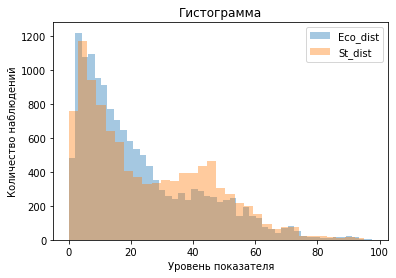

In [21]:
#  Построим гистограмму распределения расстояний поездок по автомобилям разных клссов
sns.distplot(Eco_dist, kde=False)
sns.distplot(St_dist, kde=False)
plt.xlabel('Уровень показателя')
plt.ylabel('Количество наблюдений')
plt.legend(['Eco_dist', 'St_dist'])
plt.title('Гистограмма')
plt.show()

Проверить любую выборку  на равенство средних с нормальным распределением.

In [22]:
print('Тест Шапиро на нормальность распределения ')
stat_eco, p_eco = shapiro(Eco_dist)
stat_st, p_st   = shapiro(St_dist)

print('P value Шапиро по выборке Econom = ', p_eco)
print('P value Шапиро по выборке Standart = ', p_st)

print('Распределения не являются нормальными, но вот если бы являлись, тогда ...')

print('Согласно t-тесту : stat=%.3f, p=%.3f' % (sts.ttest_ind(Eco_dist, St_dist)))
print('гипотеза о равенстве средних не подтверждается')

Тест Шапиро на нормальность распределения 
P value Шапиро по выборке Econom =  0.0
P value Шапиро по выборке Standart =  0.0
Распределения не являются нормальными, но вот если бы являлись, тогда ...
Согласно t-тесту : stat=-10.854, p=0.000
гипотеза о равенстве средних не подтверждается


C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
print('Согласно тесту Манна Уитни : stat = %.3f, p = %.3f' % (mannwhitneyu(Eco_dist, St_dist)))

Согласно тесту Манна Уитни : stat = 69433621.500, p = 0.000


гипотеза не подтверждается

Гипотеза 2: Средняя скорость движения такси в утренние и вечерние часы пик рабочих дней существенно отличаются

In [24]:
data_fact['speed'] = data_fact['distance_km'] / (data_fact['duration_min'] / 60)

# Скорость утром в рабочие дни
morning_speed = data_fact[(data_fact.weekday_key <5) & 
                          (data_fact.hour_key    >5) & 
                          (data_fact.hour_key    <9)
                         ].speed
print (morning_speed.describe().round(2))


count    4028.00
mean       37.74
std        13.98
min         9.12
25%        26.33
50%        36.28
75%        49.05
max        74.82
Name: speed, dtype: float64


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
# Скорость вечером в рабочие дни
evening_speed = data_fact[(data_fact.weekday_key <5) & 
                          (data_fact.hour_key    >17) & 
                          (data_fact.hour_key    <20)
                         ].speed
print (evening_speed.describe().round(2))

count    6077.00
mean       38.40
std        14.91
min         6.65
25%        25.67
50%        36.67
75%        51.34
max        77.51
Name: speed, dtype: float64


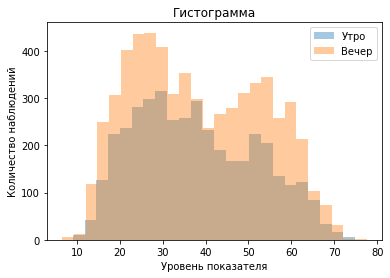

In [26]:
sns.distplot(morning_speed, kde=False)
sns.distplot(evening_speed, kde=False)
plt.xlabel('Уровень показателя')
plt.ylabel('Количество наблюдений')
plt.legend(['Утро', 'Вечер'])
plt.title('Гистограмма')
plt.show()

In [27]:
# Средняя скорость поездки утром и вечером в рабочие дни


print('Тест Шапиро на нормальность распределения ')
stat_ms, p_ms  = shapiro(morning_speed)
stat_es, p_es  = shapiro(evening_speed)

print('P value Шапиро по утренней выборке = ',  p_ms)
print('P value Шапиро по вечерней выборке = ',  p_es)

print('Распределения не являются нормальными, но вот если бы являлись, тогда ...')

print('Согласно t-тесту : stat=%.3f, p=%.3f' % (sts.ttest_ind(morning_speed, evening_speed)))
print('гипотеза о равенстве средних не подтверждается')


Тест Шапиро на нормальность распределения 
P value Шапиро по утренней выборке =  1.9985229384454302e-28
P value Шапиро по вечерней выборке =  2.507907673133948e-37
Распределения не являются нормальными, но вот если бы являлись, тогда ...
Согласно t-тесту : stat=-2.251, p=0.024
гипотеза о равенстве средних не подтверждается


In [28]:
print('Согласно тесту Манна Уитни : stat = %.3f, p = %.3f' % (mannwhitneyu(morning_speed, evening_speed)))

Согласно тесту Манна Уитни : stat = 11988863.500, p = 0.041
